In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
import warnings

warnings.filterwarnings('ignore')




#read the data
#set the path to current working directory using os.getcwd() 

path = os.getcwd()

#read the data datathon_2024_dataset.csv

df = pd.read_csv(path + '/datathon_2024_dataset_corrected.csv')



#check the data
df.head()



,Unnamed: 0,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp
0,0,20000329,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,...,1,38,5,1,0,1,24,4,3,0
1,1,20000330,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,...,1,44,5,0,0,0,24,9,6,0
2,2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,...,0,32,5,0,0,2,17,6,1,1
3,3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,...,0,20,3,1,0,1,10,4,1,0
4,4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,...,0,38,9,3,0,0,17,7,1,1


In [30]:
#group home_team, venue , city together and count the number of matches played in each city

df_venue = df.groupby(['home_team','city']).size().reset_index(name='count')

#sort the data in descending order of city and count

df_venue = df_venue.sort_values(['home_team','count'],ascending=[True,False])

#save the first row of each home_team in a new dataframe

df_venue = df_venue.groupby('home_team').head(1)

df_venue





,home_team,city,count
0,ANA,Anaheim,1894
2,ARI,Phoenix,1891
4,ATL,Atlanta,1891
6,BAL,Baltimore,1890
8,BOS,Boston,1892
10,CHA,Chicago,1892
12,CHN,Chicago,1896
14,CIN,Cincinnati,1890
17,CLE,Cleveland,1886
20,COL,Denver,1894


In [31]:
#out put the name a city 

df_venue['city'].values

#adding 'Anaheim', 'Phoenix', 'Atlanta', 'Baltimore', 'Boston', 'Chicago',
#       'Chicago', 'Cincinnati', 'Cleveland', 'Denver', 'Detroit', 'Miami',
#       'Houston', 'Kansas City', 'Los Angeles', 'Miami', 'Milwaukee',
#       'Minneapolis', 'Montreal', 'New York', 'New York', 'Oakland',
#       'Philadelphia', 'Pittsburgh', 'San Diego', 'Seattle',
#       'San Francisco', 'St. Louis', 'St. Petersburg', 'Arlington',
#       'Toronto', 'Washington' latitudes and longitudes to the dataframe

df_venue1 = df_venue['city'].values


#convert the list to dataframe

df_venue1 = pd.DataFrame(df_venue1)

#drop the duplicate values

df_venue1 = df_venue1.drop_duplicates()

df_venue1['lat']  =  [33.8366, 33.4484, 33.749, 39.2904, 42.3601, 41.8781, 39.1031, 41.4993, 39.7392, 42.3314, 25.7617, 29.7604, 39.0997, 34.0522, 43.0389, 44.9778, 45.5017, 40.7128, 37.8044, 39.9526, 40.4406, 32.7157, 47.6062, 37.7749, 38.627, 27.7676, 32.7357, 43.6532, 38.9072]
df_venue1['long'] = [-117.9143, -112.074, -84.388, -76.6122, -71.0589, -87.6298, -84.512,3 -81.6944, -104.9903, -83.0458, -80.1918, -95.3698, -94.5786, -118.2437, -87.9065, -93.265, -73.5673, -74.006, -122.2712, -75.1652, -79.9959, -117.1611, -122.3321, -122.4194, -90.1994, -82.6403, -97.1081, -79.3832, -77.0369]

#rename the column

df_venue1 = df_venue1.rename(columns={0:'city'})


#adding the latitudes and longitudes to df_venue1 based on the city

df_venue = pd.merge(df_venue, df_venue1, on= 'city'
                    , how='left')

df_venue


,home_team,city,count,lat,long
0,ANA,Anaheim,1894,33.8366,-117.9143
1,ARI,Phoenix,1891,33.4484,-112.0740
2,ATL,Atlanta,1891,33.7490,-84.3880
3,BAL,Baltimore,1890,39.2904,-76.6122
4,BOS,Boston,1892,42.3601,-71.0589
5,CHA,Chicago,1892,41.8781,-87.6298
6,CHN,Chicago,1896,41.8781,-87.6298
7,CIN,Cincinnati,1890,39.1031,-84.5120
8,CLE,Cleveland,1886,41.4993,-78.6944
9,COL,Denver,1894,39.7392,-104.9903


In [32]:
#data cleaning

# drop the df data that city is not in df_venue1's city 

df = df[df['city'].isin(df_venue1['city'])]


#1. drop th first unnamed column
df.drop(df.columns[0], axis=1, inplace=True)

#2. convert the 'game_data' string 20000403 column in to year, month, day columns
df['year'] = df['game_date'].astype(str).str[:4]
df['month'] = df['game_date'].astype(str).str[4:6]
df['day'] = df['game_date'].astype(str).str[6:8]

#3. adding a column called 'home_win' if home_score > away_score
df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)

#4. adding a column called 'away_win' if away_score > home_score
df['away_win'] = np.where(df['away_score'] > df['home_score'], 1, 0)

df.head()


,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,home_hr,home_fo,home_so,home_bb,home_hbp,year,month,day,home_win,away_win
2,20000403,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,2,17,6,1,1,2000,04,03,1,0
3,20000403,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,...,1,10,4,1,0,2000,04,03,0,0
4,20000403,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,0,17,7,1,1,2000,04,03,1,0
5,20000403,MON,LAN,False,4,10,MON02,Stade Olympique,Montreal,QUE,...,2,19,8,2,0,2000,04,03,0,1
6,20000403,NYN,SDN,True,2,1,NYC17,Shea Stadium,New York,NY,...,1,16,7,2,1,2000,04,03,1,0


In [ ]:
# write a function to track when are the home_team and away_team played. 
#Convert game_date to datetime format
df['game_date'] = pd.to_datetime(df['game_date'], format='%Y%m%d')

df.sort_values('game_date', inplace=True)

# Function to calculate the days since the last game for a given row
def last_game_info(row, df):
    # Find the previous games for both home and away teams within the same year
    past_games_home = df[(df['home_team'] == row['home_team']) & (df['game_date'] < row['game_date']) & (df['year'] == row['year'])]
    past_games_away = df[(df['away_team'] == row['away_team']) & (df['game_date'] < row['game_date']) & (df['year'] == row['year'])]

    # Calculate the days since the last game and find the last opponent, or set to 0 if there are no previous games
    if not past_games_home.empty:
        last_home_game = (row['game_date'] - past_games_home.iloc[-1]['game_date']).days
        last_home_opponent = past_games_home.iloc[-1]['away_team'] if past_games_home.iloc[-1]['home_team'] == row['home_team'] else past_games_home.iloc[-1]['home_team']
    else:
        last_home_game = 0
        last_home_opponent = '0'

    if not past_games_away.empty:
        last_away_game = (row['game_date'] - past_games_away.iloc[-1]['game_date']).days
        last_away_opponent = past_games_away.iloc[-1]['home_team'] if past_games_away.iloc[-1]['away_team'] == row['away_team'] else past_games_away.iloc[-1]['away_team']
    else:
        last_away_game = 0
        last_away_opponent = '0'
    
    return pd.Series([last_home_game, last_home_opponent, last_away_game, last_away_opponent])

# Apply the last_game_info function to each row in the DataFrame
df[['days_since_last_home_game', 'last_home_opponent', 'days_since_last_away_game', 'last_away_opponent']] = df.apply(lambda row: last_game_info(row, df), axis=1)



In [35]:
df.head(60)

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,home_hbp,year,month,day,home_win,away_win,days_since_last_home_game,last_home_opponent,days_since_last_away_game,last_away_opponent
2,2000-04-03,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,1,2000,04,03,1,0,0,0,0,0
13,2000-04-03,TOR,KCA,True,5,4,TOR02,Rogers Centre,Toronto,ONT,...,0,2000,04,03,1,0,0,0,0,0
12,2000-04-03,TEX,CHA,True,10,4,ARL02,Rangers Ballpark in Arlington,Arlington,TX,...,2,2000,04,03,1,0,0,0,0,0
11,2000-04-03,OAK,DET,False,4,7,OAK01,Oakland-Alameda County Coliseum,Oakland,CA,...,0,2000,04,03,0,1,0,0,0,0
9,2000-04-03,BAL,CLE,True,1,4,BAL12,Oriole Park at Camden Yards,Baltimore,MD,...,0,2000,04,03,0,1,0,0,0,0
8,2000-04-03,ANA,NYA,False,2,3,ANA01,Angel Stadium of Anaheim,Anaheim,CA,...,0,2000,04,03,0,1,0,0,0,0
10,2000-04-03,MIN,TBA,False,0,7,MIN03,Hubert H. Humphrey Metrodome,Minneapolis,MN,...,0,2000,04,03,0,1,0,0,0,0
6,2000-04-03,NYN,SDN,True,2,1,NYC17,Shea Stadium,New York,NY,...,1,2000,04,03,1,0,0,0,0,0
5,2000-04-03,MON,LAN,False,4,10,MON02,Stade Olympique,Montreal,QUE,...,0,2000,04,03,0,1,0,0,0,0
4,2000-04-03,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,1,2000,04,03,1,0,0,0,0,0


In [ ]:
# for home teams, if the last game is home game, change the last_home_opponent to '0'



In [67]:
from math import sin, cos, sqrt, atan2, radians

# Function to calculate the distance between two cities
def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def distance(row, df_venue, team_key, opponent_key):
    # Check if last opponent is '0', return 0 if true
    if row[opponent_key] == '0':
        return 0
    team_city = df_venue.loc[df_venue['home_team'] == row[team_key], ['lat', 'long']]
    opponent_city = df_venue.loc[df_venue['home_team'] == row[opponent_key], ['lat', 'long']]
    
    # Check if the cities are found in the df_venue
    if not team_city.empty and not opponent_city.empty:
        lat1 = radians(team_city['lat'].values[0])
        lon1 = radians(team_city['long'].values[0])
        lat2 = radians(opponent_city['lat'].values[0])
        lon2 = radians(opponent_city['long'].values[0])
        return calculate_distance(lat1, lon1, lat2, lon2)
    else:
        return None  # Or some other placeholder that indicates missing data

# Now apply the distance function to each row for both home and away distances
df['home_distance'] = df.apply(lambda row: distance(row, df_venue, 'home_team', 'last_home_opponent'), axis=1)
df['away_distance'] = df.apply(lambda row: distance(row, df_venue, 'away_team', 'last_away_opponent'), axis=1)

# Display the head of the DataFrame
df.head()


,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,...,month,day,home_win,away_win,days_since_last_home_game,days_since_last_away_game,last_home_opponent,last_away_opponent,home_distance,away_distance
2,2000-04-03,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,...,04,03,1,0,0,0,0,0,0.0,0.0
7,2000-04-03,SLN,CHN,True,7,1,STL09,Busch Stadium II,St. Louis,MO,...,04,03,1,0,0,0,0,0,0.0,0.0
3,2000-04-03,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,...,04,03,0,0,0,0,0,0,0.0,0.0
4,2000-04-03,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,...,04,03,1,0,0,0,0,0,0.0,0.0
6,2000-04-03,NYN,SDN,True,2,1,NYC17,Shea Stadium,New York,NY,...,04,03,1,0,0,0,0,0,0.0,0.0


In [69]:


#output the data into a csv 
df.to_csv('datathon_2024_dataset_cleaned.csv', index=False)



In [70]:
# data transformation

# 1. take home_team, game_date, home_win, away_pa columns and same as a new dataframe 
df1 = df[['home_team', 'year', 'home_win', 'home_distance','days_since_last_home_game']] 
# rename the columns to team, date, win, total distance
df1.columns = ['team', 'year', 'win', 'total_distance','days_since_last_game']

# 2. take away_team, game_date, away_win, home_pa columns and same as a new dataframe
df2 = df[['away_team', 'year', 'away_win', 'away_distance','days_since_last_away_game']]
# rename the columns to team, date, win, total distance
df2.columns = ['team', 'year', 'win', 'total_distance','days_since_last_game']

# 3. concatenate df1 and df2 vertically
df3 = pd.concat([df1, df2], axis=0)


In [71]:
df3.head()

#add a new column called game of the year by count the number of games played in each year
df3['games'] = df3.groupby(['team', 'year'])['year'].transform('count')

#add a new column called win games by count the number of games won in each year
df3['win_games'] = df3.groupby(['team', 'year'])['win'].transform('sum')

#add a new column called win percentage by dividing win games by games
df3['win_percentage'] = df3['win_games']/df3['games']

#add a new column called total distance by summing up the total distance travelled in each year
df3['total_distance'] = df3.groupby(['team', 'year'])['total_distance'].transform('sum')

#add a new column called total time by summing up the total time travelled in each year
df3['days_since_last_game'] = df3.groupby(['team', 'year'])['days_since_last_game'].transform('sum')

#drop the win column and drop the duplicates
df3 = df3.drop(['win'], axis=1)
df3 = df3.drop_duplicates()




In [72]:
#adding the latitudes and longitudes to df3 based on the team and home_team

df3 = pd.merge(df3, df_venue, left_on='team', right_on='home_team', how='left')

df3 = df3.drop(['home_team', 'city'], axis=1)

df3 = df3.rename(columns={'lat':'home_lat', 'long':'home_long'})





,team,year,total_distance,days_since_last_game,games,win_games,win_percentage,count,home_lat,home_long
0,ATL,2000,250180.243659,354,162,95,0.586420,1891,33.7490,-84.3880
1,SLN,2000,204546.988632,354,162,95,0.586420,1890,38.6270,-90.1994
2,CIN,2000,207957.670091,356,163,85,0.521472,1890,39.1031,-84.5120
3,FLO,2000,342923.735040,359,161,79,0.490683,962,25.7617,-80.1918
4,NYN,2000,269951.736805,353,160,93,0.581250,1890,40.7128,-74.0060
...,...,...,...,...,...,...,...,...,...,...
715,MIN,2023,228163.637819,359,162,87,0.537037,1893,44.9778,-93.2650
716,SFN,2023,399665.883657,356,162,79,0.487654,1898,37.7749,-122.4194
717,ANA,2023,395649.202187,359,162,73,0.450617,1894,33.8366,-117.9143
718,TOR,2023,230950.304296,353,162,89,0.549383,1815,43.6532,-79.3832


In [73]:
#output the data into a csv
df3.to_csv('datathon_2024_dataset_map.csv', index=False)


<Axes: >

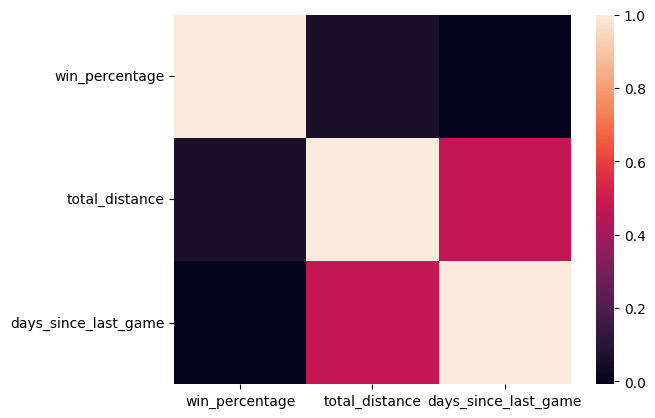

In [80]:
#do the correlation matrix for win_percentage, total_distance, days_since_last_game, win_games
corr = df3[['win_percentage', 'total_distance', 'days_since_last_game']].corr()
corr.style.background_gradient(cmap='coolwarm')

#plot the correlation matrix
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#plot the scatter plot for win_percentage and total_distance

In [81]:
#draw the line plot of win percentage vs total distance travelled for 2015 to 2023

#plt.figure(figsize=(20,10))

#sns.lineplot(x='total_distance', y='win_percentage', data=df3[df3['year'] >= '2023'], hue='year')

#plt.show()


In [92]:
import plotly.graph_objs as go

# Assuming df3 has a 'year' column
years = df3['year'].unique()

# Create a figure with plotly.graph_objs
fig = go.Figure()

for year in years:
    # Filter the DataFrame for the selected year
    df_year = df3[df3['year'] == year]

    # Adjust the size scaling factor as needed
    size_scaling_factor = 10000  # Adjust this value as needed for proper scaling

    # Create hover text
    hover_text = df_year.apply(lambda row: f"Team: {row['team']}<br>Win Percentage: {row['win_percentage']}<br>Total Distance: {row['total_distance']}<br>Year: {row['year']}", axis=1)

    # Create a scatter mapbox trace for each year
    fig.add_trace(
        go.Scattermapbox(
            lat=df_year['home_lat'],
            lon=df_year['home_long'],
            mode='markers',
            marker=go.scattermapbox.Marker(
                color=df_year['win_percentage'],
                size=df_year['total_distance'] / size_scaling_factor,
                showscale=True
            ),
            name=str(year),
            text=hover_text,
            hoverinfo='text'
        )
    )

# Update the layout to include a dropdown menu and focus the map on the US
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [year == str(y) for y in years]}],
                    label=str(year),
                    method="update"
                ) for year in years
            ]),
            direction="down",
            showactive=True,
        )
    ],
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(
            lat=37.0902,  # Approximate latitude for the center of the US
            lon=-95.7129  # Approximate longitude for the center of the US
        ),
        zoom=3
    ),
    margin={"r":0, "t":0, "l":0, "b":0}
)

# Set only the first year visible
fig.data[0].visible = True

fig.show()


In [40]:
# logistic regression 

# read processed_data.xlsx

df_model1 = pd.read_csv('data_anthony.csv')


#convert the game_date to string 

df_model1['game_date'] = df_model1['game_date'].astype(str)

#convert the game_date to datetime format

df_model1['game_date'] = pd.to_datetime(df_model1['game_date'], format='%Y-%m-%d')

#show the format of game_date

df_model1['game_date'].dtypes




dtype('<M8[ns]')

In [41]:
#datathon_2024_dataset_cleaned.csv

df_model2 = pd.read_csv('datathon_2024_dataset_cleaned.csv')

#convert the game_date to string 

df_model2['game_date'] = df_model2['game_date'].astype(str)

#convert the game_date to datetime format

df_model2['game_date'] = pd.to_datetime(df_model2['game_date'], format='%Y-%m-%d')

#show the format of game_date

df_model2['game_date'].dtypes

#merge the two dataframes, on game_date, home_team, away_team

df_model = pd.merge(df_model1, df_model2, on=['game_date', 'home_team', 'away_team'], how='right')


df_model.head(10)

,game_date,home_team,away_team,is_day_game_x,city_x,state_x,away_bb_x,home_bb_x,run_diff,single_diff,...,month,day,home_win,away_win,days_since_last_home_game,days_since_last_away_game,last_home_opponent,last_away_opponent,home_distance,away_distance
0,2000-04-03,ATL,COL,1,Atlanta,GA,0.001838,0.062500,2,1,...,4,3,1,0,0,0,0,0,0.0,0.0
1,2000-04-03,SLN,CHN,1,St. Louis,MO,0.002287,0.073171,6,3,...,4,3,1,0,0,0,0,0,0.0,0.0
2,2000-04-03,CIN,MIL,1,Cincinnati,OH,0.009259,0.250000,0,-3,...,4,3,0,0,0,0,0,0,0.0,0.0
3,2000-04-03,FLO,SFN,0,Miami,FL,0.000731,0.026316,2,4,...,4,3,1,0,0,0,0,0,0.0,0.0
4,2000-04-03,NYN,SDN,1,New York,NY,0.000000,0.000000,1,-2,...,4,3,1,0,0,0,0,0,0.0,0.0
5,2000-04-03,MIN,TBA,0,Minneapolis,MN,0.000000,0.000000,-7,-3,...,4,3,0,1,0,0,0,0,0.0,0.0
6,2000-04-03,MON,LAN,0,Montreal,QUE,0.002448,0.105263,-6,1,...,4,3,0,1,0,0,0,0,0.0,0.0
7,2000-04-03,BAL,CLE,1,Baltimore,MD,0.001544,0.054054,-3,0,...,4,3,0,1,0,0,0,0,0.0,0.0
8,2000-04-03,OAK,DET,0,Oakland,CA,0.003836,0.176471,-3,-6,...,4,3,0,1,0,0,0,0,0.0,0.0
9,2000-04-03,TEX,CHA,1,Arlington,TX,0.001389,0.050000,6,-3,...,4,3,1,0,0,0,0,0,0.0,0.0


In [42]:
# drop the columns that are not needed from df_model1.shape[1] + 1 to df_model1.shape[1] + df_model2.shape[1] - 6
df_model.drop(df_model.iloc[:, df_model1.shape[1] : df_model1.shape[1] + df_model2.shape[1] - 9], axis=1, inplace=True)

In [43]:
#drop coulum  last_home_opponent	last_away_opponent	

df_model.drop(['last_home_opponent', 'last_away_opponent'], axis=1, inplace=True)

df_model.head(10)

,game_date,home_team,away_team,is_day_game_x,city_x,state_x,away_bb_x,home_bb_x,run_diff,single_diff,...,hr_diff,pa_diff,free_base_diff,home_k,away_k,field_diff,days_since_last_home_game,days_since_last_away_game,home_distance,away_distance
0,2000-04-03,ATL,COL,1,Atlanta,GA,0.001838,0.062500,2,1,...,2,-2,0,0.218750,0.176471,-0.027574,0,0,0.0,0.0
1,2000-04-03,SLN,CHN,1,St. Louis,MO,0.002287,0.073171,6,3,...,3,9,-3,0.170732,0.187500,-0.123476,0,0,0.0,0.0
2,2000-04-03,CIN,MIL,1,Cincinnati,OH,0.009259,0.250000,0,-3,...,1,-7,4,0.050000,0.148148,-0.018519,0,0,0.0,0.0
3,2000-04-03,FLO,SFN,0,Miami,FL,0.000731,0.026316,2,4,...,-1,2,-1,0.210526,0.194444,-0.024854,0,0,0.0,0.0
4,2000-04-03,NYN,SDN,1,New York,NY,0.000000,0.000000,1,-2,...,0,-3,-2,0.266667,0.212121,-0.042424,0,0,0.0,0.0
5,2000-04-03,MIN,TBA,0,Minneapolis,MN,0.000000,0.000000,-7,-3,...,-2,-7,0,0.176471,0.195122,0.017217,0,0,0.0,0.0
6,2000-04-03,MON,LAN,0,Montreal,QUE,0.002448,0.105263,-6,1,...,0,-5,2,0.105263,0.186047,-0.104651,0,0,0.0,0.0
7,2000-04-03,BAL,CLE,1,Baltimore,MD,0.001544,0.054054,-3,0,...,-2,2,-5,0.189189,0.228571,-0.138996,0,0,0.0,0.0
8,2000-04-03,OAK,DET,0,Oakland,CA,0.003836,0.176471,-3,-6,...,3,-12,4,0.294118,0.195652,0.138107,0,0,0.0,0.0
9,2000-04-03,TEX,CHA,1,Arlington,TX,0.001389,0.050000,6,-3,...,4,4,-4,0.025000,0.166667,-0.213889,0,0,0.0,0.0


In [32]:
df_model.shape

(58076, 20)

In [44]:
# save the data into a csv file
df_model.to_csv('datathon_2024_dataset_model1.csv', index=False)


In [17]:
# do a MLP model consider run_diff as a target variable and the rest as features using df_model

# read the data



data_model = pd.read_csv('datathon_2024_dataset_model.csv')

#drop the columns that are not needed home_team	away_team	is_day_game_x	city_x	state_x 

data_model.drop(['game_date','home_team', 'away_team', 'is_day_game_x', 'city_x', 'state_x'], axis=1, inplace=True)



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# define the target variable and features
y = data_model['run_diff']
X = data_model.drop(['run_diff'], axis=1)

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Define the MLP model
mlp = MLPRegressor(max_iter=5000)

# Set up the parameter grid for Grid Search
parameter_space = {
    'hidden_layer_sizes': [(25,25), (15,30,15)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Grid Search with cross-validation
grid_search = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

# Print best parameter set
print("Best parameters found:\n", grid_search.best_params_)

# Evaluate on the validation set
y_pred_val = grid_search.predict(X_val)
print("Validation MSE:", mean_squared_error(y_val, y_pred_val))

# Evaluate on the test set
y_pred_test = grid_search.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred_test))



Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (15, 30, 15), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Validation MSE: 4.527811364063069
Test MSE: 4.448568045147919


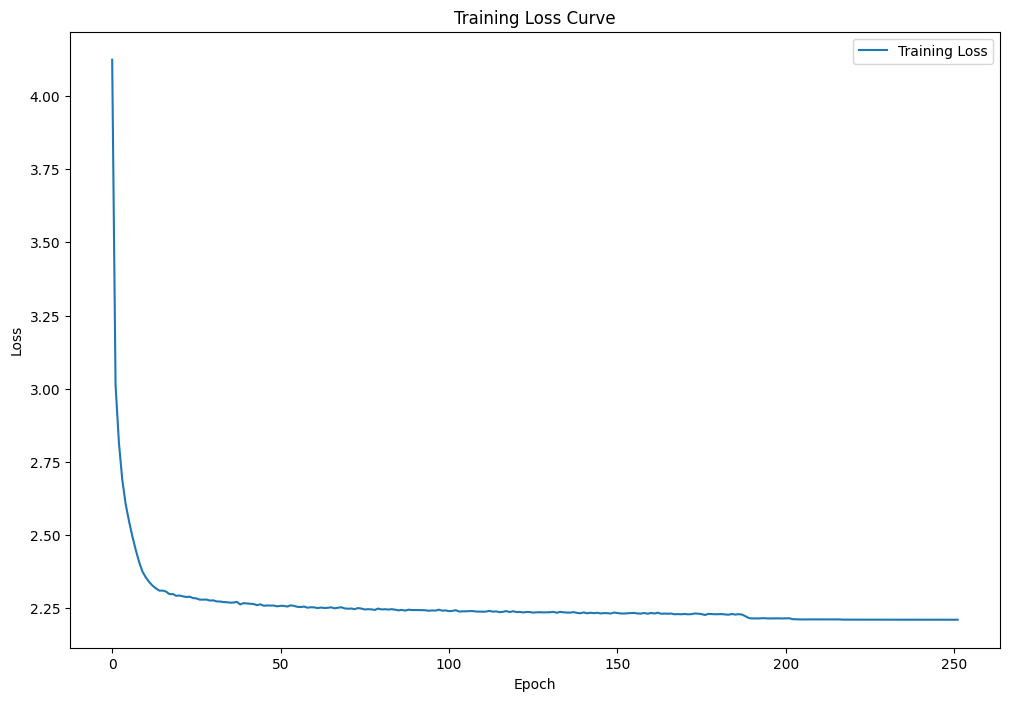

In [18]:
import matplotlib.pyplot as plt

# Get the training loss from the history object
training_loss = grid_search.best_estimator_.loss_curve_

# Create a figure with matplotlib.pyplot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the training loss
ax.plot(training_loss, label='Training Loss')

# Set the title and axis labels
ax.set_title('Training Loss Curve')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Set the legend
ax.legend()

# Show the plot
plt.show()


  0%|          | 0/200 [00:00<?, ?it/s]

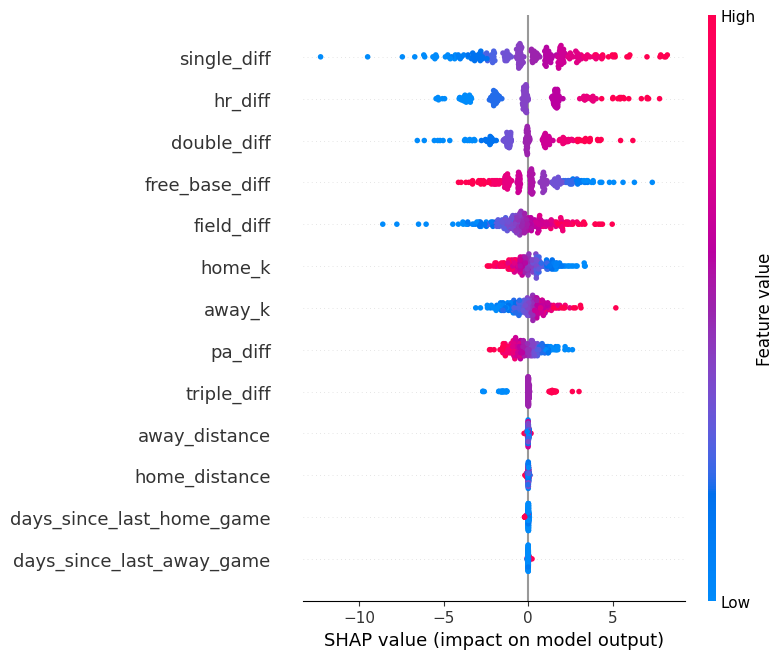

In [25]:
import shap
import numpy as np


# Randomly sampling 20 points from the training data
X_sample = shap.sample(X_train, 200)

# Create the explainer object with the training data or a summary of it
explainer = shap.KernelExplainer(grid_search.predict, shap.sample(X_train, 200))

# Calculate the SHAP values for the selected samples
shap_values = explainer.shap_values(X_sample)

# Plot the SHAP values for the selected samples
shap.summary_plot(shap_values, X_sample, feature_names=data_model.drop(['run_diff'], axis=1).columns)


